<a href="https://colab.research.google.com/github/douglassesi/Python/blob/master/Exerc%C3%ADcio_2_1_Modelos_de_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ativando a utilização do Google Drive

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


#Importando as bibliotecas

In [0]:
import pandas as pd
import numpy as np
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


#Carregando o dataset

In [0]:
df_tempoMedio =  pd.read_csv('/gdrive/My Drive/Trabalhos 11IA/Modelos de IA/2-1 - USUARIO TEMPO MEDIO/Usuarios-TempoMedioQuantidade.csv',encoding="latin1", sep=";")

In [0]:
df_tempoMedio.head()

,NomeUsuario,Login,Email,NomeEquipe,Quantidade,TempoMedio
0,dadostab1,dadostab1,dadostab1@dadospesquisa.com.br,Equipe Dados Pesquisa,1498,0
1,axistab2,axistab2,axistab2@axiscriativa.com.br,Equipe Axis Criativa,461,75
2,axistab1,axistab1,axistab1@axiscriativa.com.br,Equipe Axis Criativa,445,7
3,planocdetab1,planocdetab1,planocdetab1@planocde.com.br,Equipe PlanoCDE,423,140
4,Usuario11,usuario11,usuario11@marketnnova.com,Equipe Marketnnova,351,22


#Replicando o dataset origem apenas com as colunas necessárias

In [0]:
df_tempoMedio_means = df_tempoMedio[['NomeEquipe','Quantidade','TempoMedio']]

In [7]:
df_tempoMedio_means

,NomeEquipe,Quantidade,TempoMedio
0,Equipe Dados Pesquisa,1498,0
1,Equipe Axis Criativa,461,75
2,Equipe Axis Criativa,445,7
3,Equipe PlanoCDE,423,140
4,Equipe Marketnnova,351,22
...,...,...,...
597,Equipe Korn Ferry,1,1
598,Equipe Citrosuco,1,16
599,Equipe Citrosuco,1,12
600,Equipe Citrosuco,1,46


#Criando OneHotEnconding para a 'NomeEquipe'

In [0]:
df_tempoMedio_means =pd.get_dummies(df_tempoMedio_means,prefix=['NomeEquipe'], drop_first=True)

#Trabalhando com K-Means

In [0]:
kmeans7 = KMeans(n_clusters=7)

##Teste de Kmeans com 7 Clusters

In [10]:
kmeans7.fit(df_tempoMedio_means)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
print(kmeans7.labels_)

[2 5 5 5 5 5 5 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 6 1 0 6 6 6 6 1 6 6 6 1 6 6 1 6 1
 6 6 6 6 6 6 6 6 6 1 6 6 6 1 1 1 0 6 1 1 6 6 6 6 6 0 0 1 6 0 6 6 6 6 6 0 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 0 6 6 6 6 6 0 6 6 6 6 0 6 0 6 6 6 6 0 6 0 6
 6 6 6 6 6 6 0 6 6 6 0 6 6 6 6 6 0 6 6 6 6 6 6 0 6 6 6 6 6 0 6 6 6 6 6 0 6
 6 6 6 6 6 6 0 6 0 6 6 6 6 6 0 0 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 0 0 6 6 0 6 6 6 0 6 6 0 6 6 0 6 6 6 6 6 6 6 6 6 6 0 0 6 6 6 0 0 6 6 6 6
 0 6 0 6 6 6 0 6 6 0 6 6 0 6 6 6 6 0 6 6 6 6 6 6 0 6 0 6 6 6 6 0 6 6 0 0 6
 6 6 6 6 6 6 0 6 0 6 6 6 0 6 6 6 0 6 6 0 6 6 0 0 0 6 6 6 6 6 0 6 6 6 6 0 6
 6 6 6 6 6 6 6 6 6 6 6 6 0 6 6 6 6 6 0 6 0 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 0 6 6 6 6 6 0 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 0 6 0
 6 6 6 6 6 6 6 6 6 6 6 0 0 0 6 6 6 0 6 6 6 6 0 6 6 0 6 0 6 6 6 0 6 6 6 0 6
 6 6 6 6 6 6 6 6 6 6 0 6 

##Encontrando a melhor quantidade de clusters para o modelo

In [0]:
inertias =[]
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, max_iter=100).fit(df_tempoMedio_means)    
    #somatório dos erros quadráticos das instâncias de cada cluster
    inertias.append(kmeans.inertia_)

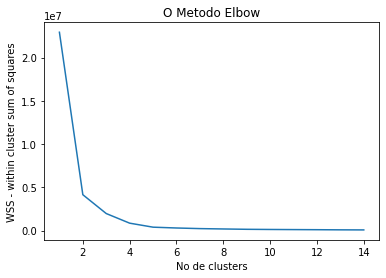

In [13]:
plt.figure(1)
plt.plot(range(1, 15), inertias)
plt.title('O Metodo Elbow')
plt.xlabel('No de clusters')
plt.ylabel('WSS - within cluster sum of squares')
plt.show()

##Encontrado a quantidade ideal de clusters, iremos ajustar o cálculo e plotar

In [0]:
kmeans4 = KMeans(n_clusters=4)

In [15]:
kmeans4.fit(df_tempoMedio_means)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
df_tempoMedio_means["cluster"] = kmeans4.labels_

Text(0.5, 1.0, 'K-Means - TempoMedio')

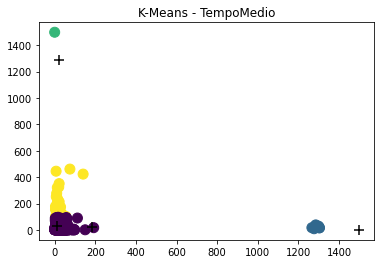

In [17]:
plt.scatter(df_tempoMedio_means.TempoMedio,df_tempoMedio_means.Quantidade, c=df_tempoMedio_means.cluster, s=100)
plt.scatter(kmeans4.cluster_centers_[:,0],kmeans4.cluster_centers_[:,1],s=100,c='black',label="Centroids",marker='+')
plt.title("K-Means - TempoMedio")

#Tralhando com DBSCAN

In [0]:
df_tempoMedio_dbscan = df_tempoMedio_means.drop('cluster',axis=1)


In [19]:
df_tempoMedio_dbscan

,Quantidade,TempoMedio,NomeEquipe_Equipe Citrosuco,NomeEquipe_Equipe Coplas,NomeEquipe_Equipe Dados Pesquisa,NomeEquipe_Equipe Daxia,NomeEquipe_Equipe Estrada Velasquez,NomeEquipe_Equipe Estratgias GalvÆo,NomeEquipe_Equipe GFK Pesq. Leads,NomeEquipe_Equipe GFK Pesq. SatisfaÆo,NomeEquipe_Equipe Grupo Speed,NomeEquipe_Equipe Korn Ferry,NomeEquipe_Equipe Lbel,NomeEquipe_Equipe Marketnnova,NomeEquipe_Equipe Mil Sapatilhas,NomeEquipe_Equipe PlanoCDE,NomeEquipe_Equipe Semesp,NomeEquipe_Equipe Simetria,NomeEquipe_Equipe Teste,NomeEquipe_Equipe Wone Bank,NomeEquipe_Equipe teambiente,NomeEquipe_Equipe µbaco,NomeEquipe_Equipo Nielsen,NomeEquipe_Equipo Ni¤o Jesus,NomeEquipe_bCare
0,1498,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,461,75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,445,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,423,140,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,351,22,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
598,1,16,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
599,1,12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
600,1,46,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
SS = StandardScaler().fit_transform(df_tempoMedio_dbscan)

In [24]:
db = DBSCAN(eps=0.3,min_samples=5).fit(SS)
print(db.labels_)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0  0  0  0 -1  0  1  0  1 -1  1
  1  1  0  1 -1  1  2 -1 -1  2  2  2  2 -1  2  1 -1  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2 -1  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2 -1  2  2  3  3  2  3  3  2 -1  4
  2 -1 -1  3  3  4 -1  2 -1  4 -1 -1  4  2  4 -1  5  5 -1  5  5  5  5  5
  4  5  5  5  4  4  4 -1 -1  4  4  2  3  3 -1 -1  3  3  4 -1 -1 -1 -1 -1
 -1  3 -1 -1  3 -1  3  2  3 -1  3  2  6 -1 -1  2  3  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6 -1  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  6 -1  6 -1  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6 -1  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6 -1  6
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6

In [0]:
df_tempoMedio_dbscan['cluster'] = db.labels_

Text(0.5, 1.0, 'K-Means - TempoMedio')

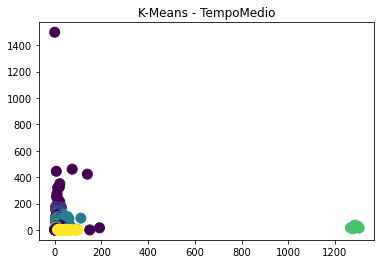

In [26]:
plt.scatter(df_tempoMedio_dbscan.TempoMedio,df_tempoMedio_dbscan.Quantidade, c=df_tempoMedio_dbscan.cluster, s=100)
#plt.scatter(db.,s=100,c='black',label="Centroids",marker='+')
plt.title("K-Means - TempoMedio")